In [2]:

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.layers import Dense, Input, Dropout,Flatten, Conv2D
from tensorflow.keras.layers import BatchNormalization, Activation, MaxPooling2D

ModuleNotFoundError: No module named 'tensorflow'

In [4]:
import tensorflow

ModuleNotFoundError: No module named 'tensorflow'

In [ ]:
pip install tensorflow


   ---------------------------------------- 0.0/377.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/377.0 MB ? eta -:--:--
   ---------------------------------------- 0.1/377.0 MB 1.8 MB/s eta 0:03:31
   ---------------------------------------- 0.3/377.0 MB 2.1 MB/s eta 0:02:59
   ---------------------------------------- 0.6/377.0 MB 2.7 MB/s eta 0:02:19
   ---------------------------------------- 0.6/377.0 MB 2.6 MB/s eta 0:02:24
   ---------------------------------------- 0.8/377.0 MB 2.9 MB/s eta 0:02:11
   ---------------------------------------- 1.2/377.0 MB 3.7 MB/s eta 0:01:43
   ---------------------------------------- 1.6/377.0 MB 4.3 MB/s eta 0:01:29
   ---------------------------------------- 1.9/377.0 MB 4.6 MB/s eta 0:01:21
   ---------------------------------------- 2.2/377.0 MB 4.7 MB/s eta 0:01:21
   ---------------------------------------- 2.7/377.0 MB 5.0 MB/s eta 0:01:16
   ---------------------------------------- 3.1/377.0 MB 5.3 MB/s eta 0:01:11


ERROR: Could not install packages due to an OSError: [Errno 2] No such file or directory: 'C:\\Users\\gayathri.katta\\AppData\\Local\\Temp\\pip-unpack-jgnez9fa\\tensorflow-2.16.1-cp311-cp311-win_amd64.whl'


[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
import os


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_dir = 'C:/Users/gayathri.katta/Desktop/lung disease project/dataset/train'
test_dir='C:/Users/gayathri.katta/Desktop/lung disease project/dataset/test'

In [ ]:
batch_size = 1
epochs = 15
img_height = 180
img_width = 180

In [ ]:
train_dir = 'C:/Users/gayathri.katta/Desktop/lung disease project/dataset/train'


In [ ]:
train_image_generator = ImageDataGenerator(rescale=1./255)  
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,directory=train_dir,shuffle=True,target_size=(img_height, img_width),class_mode='categorical')

Found 771 images belonging to 4 classes.


In [ ]:
val_image_generator = ImageDataGenerator(rescale=1./255)  
val_data_gen = val_image_generator .flow_from_directory(batch_size=batch_size,directory=test_dir,shuffle=True,target_size=(img_height, img_width),class_mode='categorical')

Found 304 images belonging to 4 classes.


In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16
#from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.applications import ResNet50, VGG19, MobileNetV2

In [ ]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Input, Flatten, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define your input shape
input_shape = (180,180 ,3)

# Create an input tensor with the specified shape
input_tensor = Input(shape=input_shape)

# Load ResNet50 with the new input shape
resnet50_model = ResNet50(input_tensor=input_tensor, weights='imagenet', include_top=False)

# Freeze the convolutional layers
for layer in resnet50_model.layers:
    layer.trainable = False

# Add custom dense layers on top of ResNet50
flatten_layer = Flatten()(resnet50_model.output)
dense_layer = Dense(256, activation='relu')(flatten_layer)
output_layer = Dense(4, activation='softmax')(dense_layer)

# Create a new model with ResNet50 and custom layers
resnet50_classifier = Model(inputs=resnet50_model.input, outputs=output_layer)

# Compile the model
resnet50_classifier.compile(optimizer='adam',
                            loss='categorical_crossentropy',
                            metrics=['accuracy'])

# Display the model summary
resnet50_classifier.summary()

# Now, you can proceed with training by providing your data generators
# For example, assuming you have train_data_gen and val_data_gen from ImageDataGenerator
# history = resnet50_classifier.fit(train_data_gen, epochs=3, validation_data=val_data_gen)





94765736/94765736 [==============================] - 35s 0us/step

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 180, 180, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 186, 186, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 90, 90, 64)           9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 90, 90, 64)           256       ['conv1_conv[0][0]']          
 on)                     

In [ ]:
resnet50_model.trainable = False

In [ ]:
resnet50_model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 180, 180, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 186, 186, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 90, 90, 64)           9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 90, 90, 64)           256       ['conv1_conv[0][0]']          
 on)                                                                                       

In [ ]:
classifier=tf.keras.models.Sequential()
classifier.add(resnet50_model)
classifier.add(Flatten())
classifier.add(Dense(4,activation='softmax'))
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 6, 6, 2048)        23587712  
                                                                 
 flatten_1 (Flatten)         (None, 73728)             0         
                                                                 
 dense_2 (Dense)             (None, 4)                 294916    
                                                                 
Total params: 23882628 (91.10 MB)
Trainable params: 294916 (1.13 MB)
Non-trainable params: 23587712 (89.98 MB)
_________________________________________________________________


In [ ]:
classifier.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = classifier.fit(train_data_gen, epochs=3,
validation_data= val_data_gen,)

Epoch 1/3


771/771 [==============================] - 137s 170ms/step - loss: 5.4770 - accuracy: 0.5188 - val_loss: 9.4336 - val_accuracy: 0.7105
Epoch 2/3
771/771 [==============================] - 123s 160ms/step - loss: 4.5522 - accuracy: 0.6213 - val_loss: 5.6445 - val_accuracy: 0.3388
Epoch 3/3
771/771 [==============================] - 121s 157ms/step - loss: 5.9380 - accuracy: 0.6148 - val_loss: 13.4757 - val_accuracy: 0.4276


In [ ]:
classifier.save('lung_resNet50.h5')

In [ ]:
#pip install Pillow

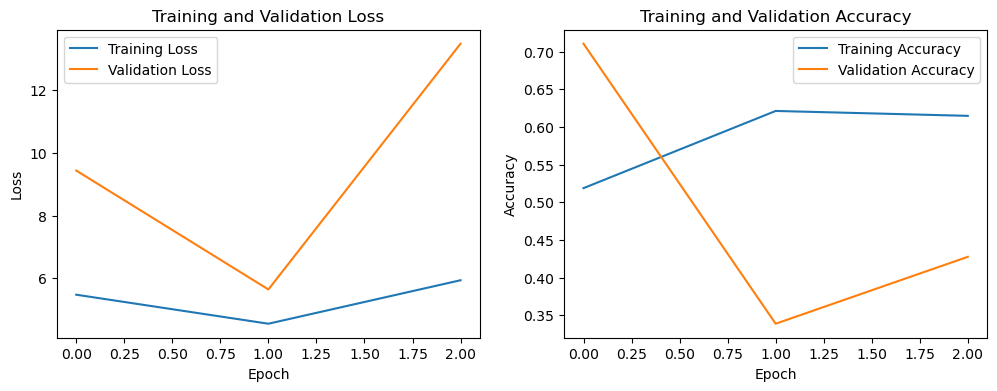

In [ ]:
import matplotlib.pyplot as plt

# Access training history
training_loss = history.history['loss']
validation_loss = history.history['val_loss']
training_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']

# Plot training history
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(training_loss, label='Training Loss')
plt.plot(validation_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(training_accuracy, label='Training Accuracy')
plt.plot(validation_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


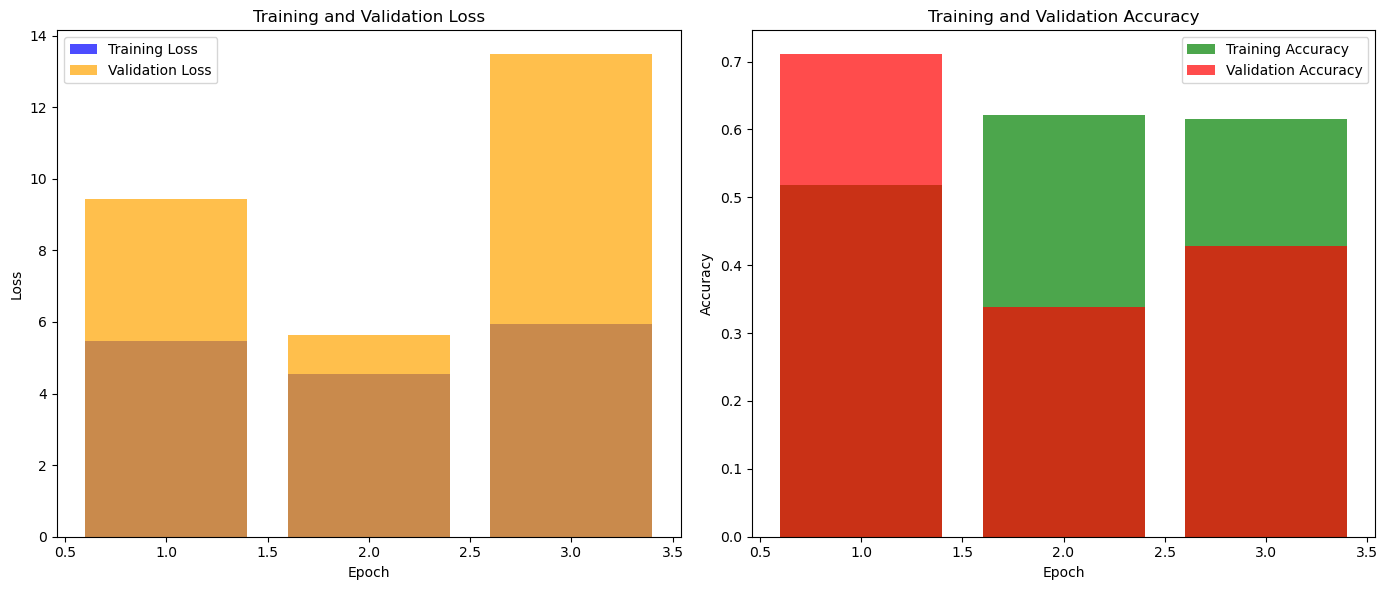

In [ ]:
import matplotlib.pyplot as plt

# Access training history
epochs = range(1, len(history.history['accuracy']) + 1)
training_loss = history.history['loss']
validation_loss = history.history['val_loss']
training_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']

# Plot training history as bar graphs
plt.figure(figsize=(14, 6))

# Training and Validation Loss
plt.subplot(1, 2, 1)
plt.bar(epochs, training_loss, label='Training Loss', color='blue', alpha=0.7)
plt.bar(epochs, validation_loss, label='Validation Loss', color='orange', alpha=0.7)
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Training and Validation Accuracy
plt.subplot(1, 2, 2)
plt.bar(epochs, training_accuracy, label='Training Accuracy', color='green', alpha=0.7)
plt.bar(epochs, validation_accuracy, label='Validation Accuracy', color='red', alpha=0.7)
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
import numpy as np

In [ ]:
y=np.concatenate([val_data_gen.next()[1] for i in range(val_data_gen.__len__())])
true_labels=np.argmax(y, axis=-1)
prediction= classifier.predict(val_data_gen, verbose=2)
prediction=np.argmax(prediction, axis=-1)

304/304 - 32s - 32s/epoch - 107ms/step


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=85)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

304/304 [==============================] - 32s 105ms/step


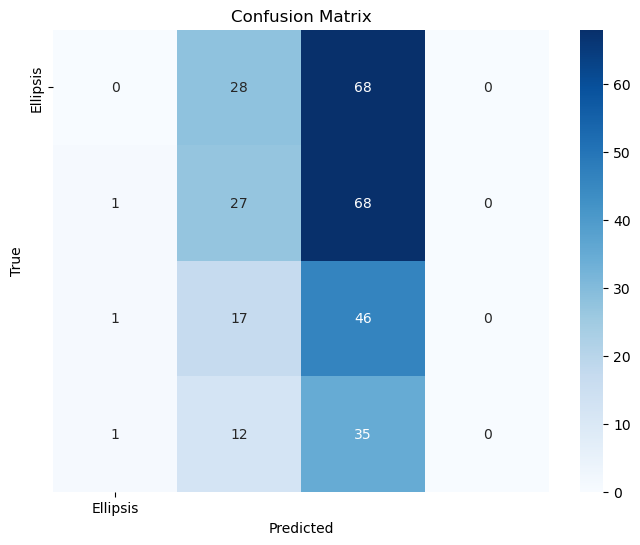

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np

# Assuming you have a validation data generator (val_data_gen)
predictions = classifier.predict(val_data_gen)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = val_data_gen.classes

cm = confusion_matrix(true_classes, predicted_classes)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[...], yticklabels=[...])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [ ]:
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
cm = confusion_matrix(y_true=true_labels, y_pred=prediction)

In [ ]:
cm_plot_labels = ['COVID19','NORMAL','PNEUMONIA','TURBERCULOSIS']

Confusion matrix, without normalization
[[ 0  8 88  0]
 [ 0 70 26  0]
 [ 0  4 60  0]
 [ 3  2 43  0]]
Accuracy: 0.428
Precision: 0.432
Recall: 0.428
F-Measure: 0.428


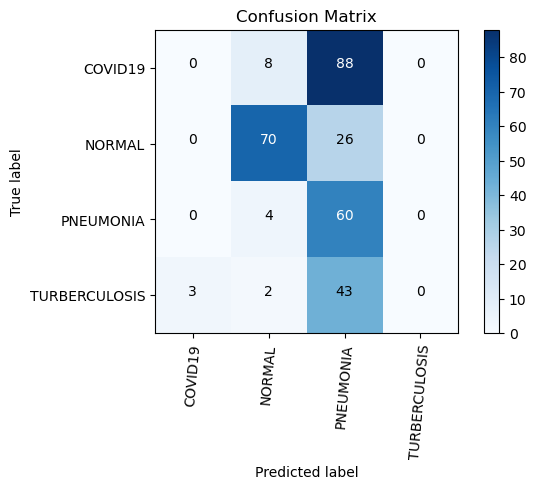

In [ ]:
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')
from sklearn.metrics import accuracy_score
acc=accuracy_score(true_labels,prediction) 
print('Accuracy: %.3f' % acc)
from sklearn.metrics import precision_score
precision = precision_score(true_labels,prediction,labels=[1,2], average='micro')
print('Precision: %.3f' % precision)
from sklearn.metrics import recall_score
recall = recall_score(true_labels,prediction, average='micro')
print('Recall: %.3f' % recall)
from sklearn.metrics import f1_score
score = f1_score(true_labels,prediction, average='micro')
print('F-Measure: %.3f' % score)

In [ ]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
def test_on_img(img):
    data=[]
    image = Image.open(img)
    image = image.resize((224,224))
    data.append(np.array(image))
    X_test=np.array(data)
    Y_pred = classifier.predict_classes(X_test)
    return image,Y_pred